# Real QCNN Loss History

In [1]:
from pennylane import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.insert(0, '/Users/tak/Github/QEmbedding/')
import Hybrid_nn
import torch
from torch import nn
import data
import pennylane as qml
import embedding

# QCNN Loss History

In [6]:
PATH_Model2 = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/Model2 pre-train/Model2_48.pt'
PATH_Model3 = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/Model3 pre-train/Model3_48.pt'

PATH_LH0_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Not pre-trained/Loss_not_trained.txt'
PATH_LH2_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model2/Loss_Model2.txt'
PATH_LH3_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model3/Loss_Model3.txt'

#PATH_LH0_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Not pre-trained/Loss_not_trained.txt'
PATH_LH2_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model2/Loss_Model2.txt'
#PATH_LH3_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model3/Loss_Model3.txt'

PATH_LH0_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Not pre-trained/Loss_not_trained.txt'
PATH_LH2_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model2/Loss_Model2.txt'
PATH_LH3_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model3/Loss_Model3.txt'

PATH_w0_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Not pre-trained/weights_not_trained.txt'
PATH_w2_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model2/weights_Model2.txt'
PATH_w3_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model3/weights_Model3.txt'

#PATH_w0_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Not pre-trained/weights_not_trained.txt'
PATH_w2_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model2/weights_Model2.txt'
#PATH_w3_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model3/weights_Model3.txt'

PATH_w0_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)//Not pre-trained/weights_not_trained.txt'
PATH_w2_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model2/weights_Model2.txt'
PATH_w3_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model3/weights_Model3.txt'

def data_read(PATH):
  textfile = open(PATH, 'r')
  data = np.array([])
  for line in textfile:
    a = np.array([float(v) for v in line.strip().split(" ")])
    data = np.append(data, a)
  return data

Loss_histories0_Jakarta = data_read(PATH_LH0_Jakarta)
Loss_histories2_Jakarta = data_read(PATH_LH2_Jakarta)
Loss_histories3_Jakarta = data_read(PATH_LH3_Jakarta)

#Loss_histories0_Perth = data_read(PATH_LH0_Perth)
Loss_histories2_Perth = data_read(PATH_LH2_Perth)
#Loss_histories3_Perth = data_read(PATH_LH3_Perth)

Loss_histories0_Toronto = data_read(PATH_LH0_Toronto)
Loss_histories2_Toronto = data_read(PATH_LH2_Toronto)
Loss_histories3_Toronto = data_read(PATH_LH3_Toronto)

weights_histories0_Jakarta = data_read(PATH_w0_Jakarta).reshape(50,4)
weights_histories2_Jakarta = data_read(PATH_w2_Jakarta).reshape(50,4)
weights_histories3_Jakarta = data_read(PATH_w3_Jakarta).reshape(50,4)

#weights_histories0_Perth = data_read(PATH_w0_Perth).reshape(50,4)
weights_histories2_Perth = data_read(PATH_w2_Perth).reshape(50,4)
#weights_histories3_Perth = data_read(PATH_w3_Perth).reshape(50,4)

weights_histories0_Toronto = data_read(PATH_w0_Toronto).reshape(50,4)
weights_histories2_Toronto = data_read(PATH_w2_Toronto).reshape(50,4)
weights_histories3_Toronto = data_read(PATH_w3_Toronto).reshape(50,4)

Loss_histories0 = np.array([Loss_histories0_Jakarta                       , Loss_histories0_Toronto])
Loss_histories2 = np.array([Loss_histories2_Jakarta, Loss_histories2_Perth, Loss_histories2_Toronto])
Loss_histories3 = np.array([Loss_histories3_Jakarta,                        Loss_histories3_Toronto])

LH0_mean, LH0_std = Loss_histories0.mean(axis=0), Loss_histories0.std(axis=0)
LH2_mean, LH2_std = Loss_histories2.mean(axis=0), Loss_histories2.std(axis=0)
LH3_mean, LH3_std = Loss_histories3.mean(axis=0), Loss_histories3.std(axis=0)


In [7]:
LB_before_traindata = 0.5 * (1 - 0.2734)
LB_Model2_traindata = 0.5 * (1 - 0.7801)
LB_Model3_traindata = 0

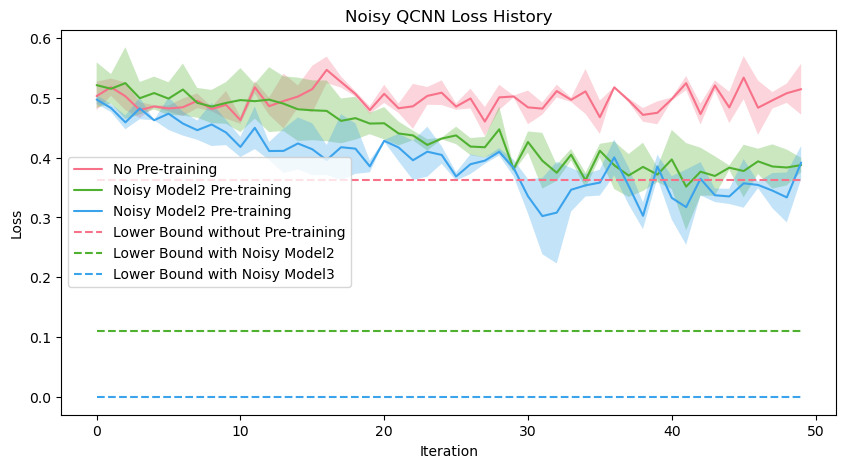

In [8]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 3)
with sns.axes_style("darkgrid"):
    ax.plot(range(len(LH0_mean)), LH0_mean, label="No Pre-training", c=clrs[0])
    ax.fill_between(range(len(LH0_mean)), LH0_mean-LH0_std, LH0_mean+LH0_std, alpha=0.3,facecolor=clrs[0])
    
    ax.plot(range(len(LH2_mean)), LH2_mean, label="Noisy Model2 Pre-training", c=clrs[1])
    ax.fill_between(range(len(LH2_mean)), LH2_mean-LH2_std, LH2_mean+LH2_std, alpha=0.3,facecolor=clrs[1])

    ax.plot(range(len(LH3_mean)), LH3_mean, label="Noisy Model2 Pre-training", c=clrs[2])
    ax.fill_between(range(len(LH3_mean)),LH3_mean-LH3_std, LH3_mean+LH3_std, alpha=0.3,facecolor=clrs[2])


    ax.plot(range(50), np.ones(50) * LB_before_traindata, linestyle='dashed', linewidth=1.5, label="Lower Bound without Pre-training", c=clrs[0])
    ax.plot(range(50), np.ones(50) * LB_Model2_traindata, linestyle='dashed', linewidth=1.5, label="Lower Bound with Noisy Model2", c=clrs[1])
    ax.plot(range(50), np.ones(50) * LB_Model3_traindata, linestyle='dashed', linewidth=1.5, label="Lower Bound with Noisy Model3", c=clrs[2])


ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_title("Noisy QCNN Loss History")
ax.legend()

# QCNN Accuracy (Sim)

In [9]:
class x_transform2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack2 = nn.Sequential(
            nn.Linear(4, 12),
            nn.ReLU(),
            nn.Linear(12, 12),
            nn.ReLU(),
            nn.Linear(12, 7)
        )
        
    def forward(self, x):
        x = self.linear_relu_stack2(x)
        return x.detach().numpy()


class x_transform3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Layer2: 14 * 14 -> 7 * 7
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully connected Layers 7 * 7 -> 7
        self.fc = torch.nn.Linear(7 * 7, 7, bias=True)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(-1, 7 * 7)
        x = self.fc(x)
        return x.detach().numpy()

model2 = x_transform2()
model3 = x_transform3()

def statepreparation(x, Trained):
    if Trained == False:
        embedding.Noisy_Four_QuantumEmbedding1(x)
    elif Trained == 'Model2':
        model2.load_state_dict(torch.load(PATH_Model2))
        x = model2(torch.tensor(x))
        embedding.Noisy_Four_QuantumEmbedding2(x)
    elif Trained == 'Model3':
        model3.load_state_dict(torch.load(PATH_Model3))
        x = model3(torch.tensor(x))
        embedding.Noisy_Four_QuantumEmbedding2(x[0])
        

dev_sim = qml.device('default.qubit', wires=4)
@qml.qnode(dev_sim)
def QCNN_classifier(params, x, Trained):
    param1 = params[0:2]
    param2 = params[2:4]

    statepreparation(x, Trained)
    embedding.U_TTN(param1, wires=[0,1])
    embedding.U_TTN(param1, wires=[3,2])
    embedding.U_TTN(param2, wires=[1,2])
    return qml.expval(qml.PauliZ(2))

Model2

In [19]:

feature_reduction = 'PCA4'
classes = [0,1]
X_train, X_test, Y_train, Y_test = data.data_load_and_process('mnist', feature_reduction=feature_reduction, classes=classes)
X_train, X_test = torch.tensor(X_train).to(torch.float32), torch.tensor(X_test).to(torch.float32)
Y_train = [-1 if y == 0 else 1 for y in Y_train]
Y_test = [-1 if y == 0 else 1 for y in Y_test]

No pre-training

In [20]:
def accuracy_test(predictions, labels):
    acc = 0
    for l, p in zip(labels, predictions):
        if np.abs(l - p) < 1:
            acc = acc + 1
    return acc / len(labels)

prediction0_Jakarta = [QCNN_classifier(weights_histories0_Jakarta[-1], x, Trained=False) for x in X_test]
#prediction0_Perth = [QCNN_classifier(weights_histories0_Perth[-1], x, Trained=False) for x in X_test]
prediction0_Toronto = [QCNN_classifier(weights_histories0_Toronto[-1], x, Trained=False) for x in X_test]

accuracy0_Jakarta = accuracy_test(prediction0_Jakarta, Y_test)
#accuracy0_Perth = accuracy_test(prediction0_Perth, Y_test)
accuracy0_Toronto = accuracy_test(prediction0_Toronto, Y_test)

/Users/tak/miniforge3/envs/QC/lib/python3.10/site-packages/pennylane/math/utils.py:223: UserWarning: Contains tensors of types {'torch', 'autograd'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


In [21]:
print("Accuracies for No pre-training")
print("-----------------------\n")
print(f"IBM_Jakarta: {accuracy0_Jakarta}")
#print(f"IBM_Perth: {accuracy0_Perth}")
print(f"IBM_Toronto: {accuracy0_Toronto}")

Accuracies for No pre-training
-----------------------

IBM_Jakarta: 0.5215130023640662
IBM_Toronto: 0.5550827423167849


In [11]:
def accuracy_test(predictions, labels):
    acc = 0
    for l, p in zip(labels, predictions):
        if np.abs(l - p) < 1:
            acc = acc + 1
    return acc / len(labels)


prediction2_Jakarta = [QCNN_classifier(weights_histories2_Jakarta[-1], x, Trained='Model2') for x in X_test]
prediction2_Perth = [QCNN_classifier(weights_histories2_Perth[-1], x, Trained='Model2') for x in X_test]
prediction2_Toronto = [QCNN_classifier(weights_histories2_Toronto[-1], x, Trained='Model2') for x in X_test]

accuracy2_Jakarta = accuracy_test(prediction2_Jakarta, Y_test)
accuracy2_Perth = accuracy_test(prediction2_Perth, Y_test)
accuracy2_Toronto = accuracy_test(prediction2_Toronto, Y_test)

/var/folders/ym/ry24dhs911s7zbqfbhs5ns2m0000gn/T/ipykernel_4098/2299359915.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = model2(torch.tensor(x))


In [12]:
print("Accuracies for Model 2")
print("-----------------------\n")
print(f"IBM_Jakarta: {accuracy2_Jakarta}")
print(f"IBM_Perth: {accuracy2_Perth}")
print(f"IBM_Toronto: {accuracy2_Toronto}")


Accuracies for Model 2
-----------------------

IBM_Jakarta: 0.9725768321513002
IBM_Perth: 0.9735224586288416
IBM_Toronto: 0.968321513002364


Model3

In [13]:
feature_reduction = False
X_train, X_test, Y_train, Y_test = data.data_load_and_process('mnist', feature_reduction=feature_reduction, classes=classes)
X_train, X_test = torch.tensor(X_train).to(torch.float32), torch.tensor(X_test).to(torch.float32)
X_train, X_test = X_train.permute(0, 3, 1, 2), X_test.permute(0, 3, 1, 2)
Y_train = [-1 if y == 0 else 1 for y in Y_train]
Y_test = [-1 if y == 0 else 1 for y in Y_test]


In [16]:

prediction3_Jakarta = [QCNN_classifier(weights_histories3_Jakarta[-1], x, Trained='Model3') for x in X_test]
#prediction3_Perth = [QCNN_classifier(weights_histories3_Perth[-1], x, Trained='Model3') for x in X_test]
prediction3_Toronto = [QCNN_classifier(weights_histories3_Toronto[-1], x, Trained='Model3') for x in X_test]

accuracy3_Jakarta = accuracy_test(prediction3_Jakarta, Y_test)
#accuracy3_Perth = accuracy_test(prediction3_Perth, Y_test)
accuracy3_Toronto = accuracy_test(prediction3_Toronto, Y_test)

/var/folders/ym/ry24dhs911s7zbqfbhs5ns2m0000gn/T/ipykernel_4098/2299359915.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = model3(torch.tensor(x))


In [22]:
print("Accuracies for Model 3")
print("-----------------------\n")
print(f"IBM_Jakarta: {accuracy3_Jakarta}")
#print(f"IBM_Perth: {accuracy3_Perth}")
#print(f"IBM_Toronto: {accuracy3_Toronto}")

Accuracies for Model 3
-----------------------

IBM_Jakarta: 0.840661938534279


Final Results

In [24]:
accuracies0 = np.array([accuracy0_Jakarta,                  accuracy0_Toronto])
accuracies2 = np.array([accuracy2_Jakarta, accuracy2_Perth, accuracy2_Toronto])
accuracies3 = np.array([accuracy3_Jakarta,                  accuracy3_Toronto])
print("Accuracies")
print("--------------\n")
print(f"No pre-training: {accuracies0.mean()} ± {accuracies0.std()}")
print(f"Model2: {accuracies2.mean()} ± {accuracies2.std()}")
print(f"Model3: {accuracies3.mean()} ± {accuracies3.std()}")

Accuracies
--------------

No pre-training: 0.5382978723404255 ± 0.016784869976359362
Model2: 0.9714736012608353 ± 0.0022620488722470203
Model3: 0.8104018912529551 ± 0.030260047281323865
